In [1]:
# Import Statements
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import random


### Understanding the components of Time Series Data set

First, you'll simulate a time series dataset. This will help us better understand the components of a time series and the concepts underlying time series analysis and grok, so to speak, the steps that go into modeling time series using a generative modeling approach. In other words, given the time series plotted below, our goal is the build a data set that is most similar to the one below.

<img src="images/simulated_dataset.png" alt="drawing" style="width:800px;"/>

Use your understanding of how seasonality trend and noise interact in a time series to generate data set similar to the one above.
The information that you need to reproduce this dataset is provided below:

* The data contains 200 months worth of data

* The trend is an exponential function: 

$$y = (1.5^{(\frac{\sqrt(x)}{2})}) $$

* The seasonality in this dataset is quarterly (frequency of 4 months)
and is a sine curve with an amplitude of 1.2

* The noise is Gaussian with a mean of $\mu=0$ and $\sigma=1$  

1. Compute and plot each of the components of your time series independently.

* Plot your dta to verify your solutiojn. Your plots should look like the following:

<img src="images/three_plots.png" alt="drawing" style="width:500px;"/>

2. Generate the time series by combining the three components. 

Important: use the following seed so that graph matches the one above exactly. 

```
np.random.seed(42)
```

In [2]:
# Generate a random seed
np.random.seed(42)
# Calculate the range from 0 to 200 to represent the months worth of data
x_axis = np.arange(0, 200)
# Generate the exponential function
exp = 29 + 1.01**x_axis
# Print the values associated with the exponential function to determine if the data is trending correctly
exp

array([30.        , 30.01      , 30.0201    , 30.030301  , 30.04060401,
       30.05101005, 30.06152015, 30.07213535, 30.08285671, 30.09368527,
       30.10462213, 30.11566835, 30.12682503, 30.13809328, 30.14947421,
       30.16096896, 30.17257864, 30.18430443, 30.19614748, 30.20810895,
       30.22019004, 30.23239194, 30.24471586, 30.25716302, 30.26973465,
       30.282432  , 30.29525631, 30.30820888, 30.32129097, 30.33450388,
       30.34784892, 30.3613274 , 30.37494068, 30.38869009, 30.40257699,
       30.41660276, 30.43076878, 30.44507647, 30.45952724, 30.47412251,
       30.48886373, 30.50375237, 30.51878989, 30.53397779, 30.54931757,
       30.56481075, 30.58045885, 30.59626344, 30.61222608, 30.62834834,
       30.64463182, 30.66107814, 30.67768892, 30.69446581, 30.71141047,
       30.72852457, 30.74580982, 30.76326792, 30.7809006 , 30.7987096 ,
       30.8166967 , 30.83486367, 30.8532123 , 30.87174443, 30.89046187,
       30.90936649, 30.92846015, 30.94774475, 30.9672222 , 30.98

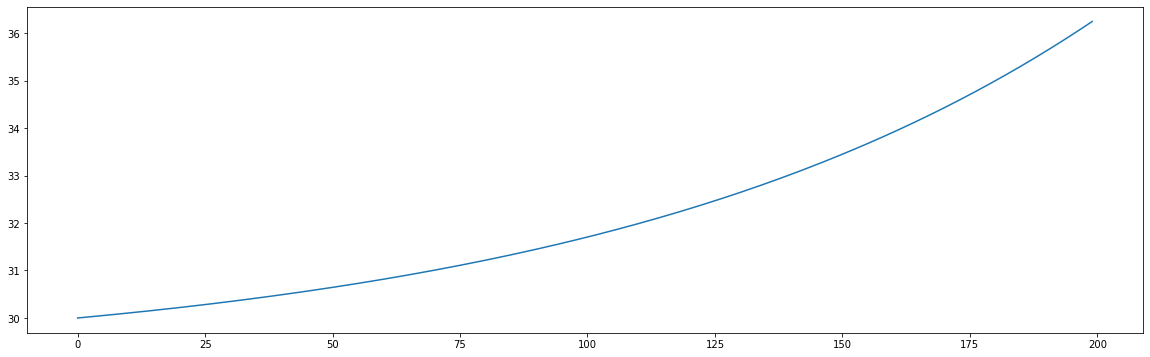

In [3]:
# Plot the trend
plt.figure(figsize=(20,6))
plt.plot(x_axis, exp)

In [4]:
# Determine the range for the seasonality
x_axis = np.arange(0, 200)
# Calculate the seasonality based on the sin amplitude of 1.2
seasonality = 1.2 * np.sin(2 * np.pi * x_axis / 4)
# Print the values associated with seasonality
seasonality

array([ 0.00000000e+00,  1.20000000e+00,  1.46957616e-16, -1.20000000e+00,
       -2.93915232e-16,  1.20000000e+00,  4.40872848e-16, -1.20000000e+00,
       -5.87830464e-16,  1.20000000e+00,  7.34788079e-16, -1.20000000e+00,
       -8.81745695e-16,  1.20000000e+00,  1.02870331e-15, -1.20000000e+00,
       -1.17566093e-15,  1.20000000e+00,  1.32261854e-15, -1.20000000e+00,
       -1.46957616e-15,  1.20000000e+00,  5.87979019e-15, -1.20000000e+00,
       -1.76349139e-15,  1.20000000e+00, -2.35280741e-15, -1.20000000e+00,
       -2.05740662e-15,  1.20000000e+00,  6.46762065e-15, -1.20000000e+00,
       -2.35132185e-15,  1.20000000e+00, -1.76497694e-15, -1.20000000e+00,
       -2.64523709e-15,  1.20000000e+00,  7.05545112e-15, -1.20000000e+00,
       -2.93915232e-15,  1.20000000e+00, -1.17714648e-15, -1.20000000e+00,
       -1.17595804e-14,  1.20000000e+00,  7.64328158e-15, -1.20000000e+00,
       -3.52698278e-15,  1.20000000e+00, -5.89316017e-16, -1.20000000e+00,
        4.70561482e-15,  

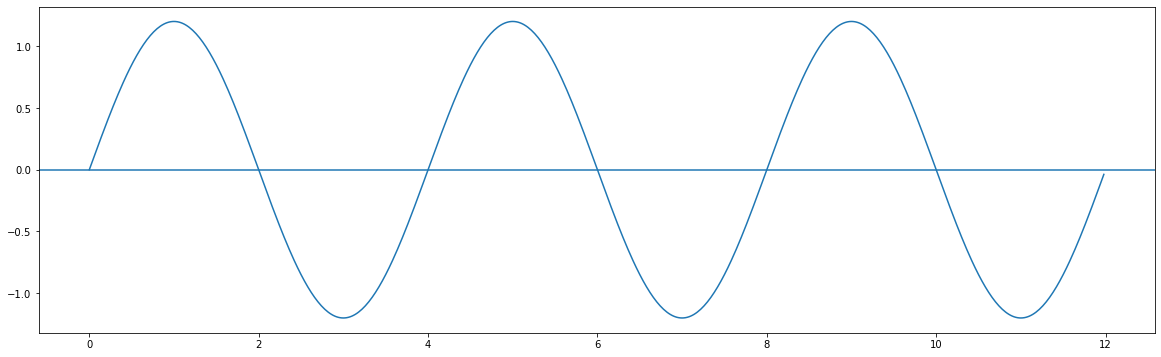

In [25]:
# Plot the seasonality of the sin curve with the amplitude of 1.2
values = np.arange(0,12,.02)
seasonality_values = 1.2 * np.sin(2 * np.pi * values / 4)
plt.figure(figsize=(20, 6))
plt.axhline(y=0)
plt.plot(values, seasonality_values)
plt.show()

In [26]:
# write  your code for simulating the noise 
x_axis = np.arange(0, 200)

noise = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    # Noise with a mean of 0 and sigma of 1
    noise[i] = np.random.normal(0, 0.1)  

# Print the values within the noise
noise

array([ 0.09261775,  0.19094166, -0.13985676,  0.05629692, -0.06506426,
       -0.04871254, -0.05923939, -0.08639908,  0.00485216, -0.08309501,
        0.02704568, -0.00502381, -0.0238948 , -0.09075637, -0.05767713,
        0.07553912,  0.05009172, -0.09775552,  0.00993323,  0.07513871,
       -0.16694053,  0.05433602, -0.06626238,  0.05705987, -0.07632592,
       -0.18048821, -0.16275424,  0.00480849,  0.02597225, -0.09043166,
        0.06385925, -0.16615201, -0.00660798, -0.12110162, -0.06518361,
        0.00473987, -0.08604134, -0.03845555,  0.10062928, -0.05768919,
        0.08356921, -0.11297069,  0.05298042,  0.14415686, -0.24716445,
       -0.07968953,  0.05770721, -0.02030454,  0.03711459, -0.06039852,
        0.00865898, -0.01556772,  0.11677821,  0.02544208,  0.03376027,
       -0.0411877 , -0.04876062, -0.04325582,  0.03944521, -0.04209845,
        0.02897749,  0.20754008,  0.08711247, -0.03260235,  0.12012139,
       -0.04080754, -0.20381245, -0.10080863, -0.18707919, -0.03

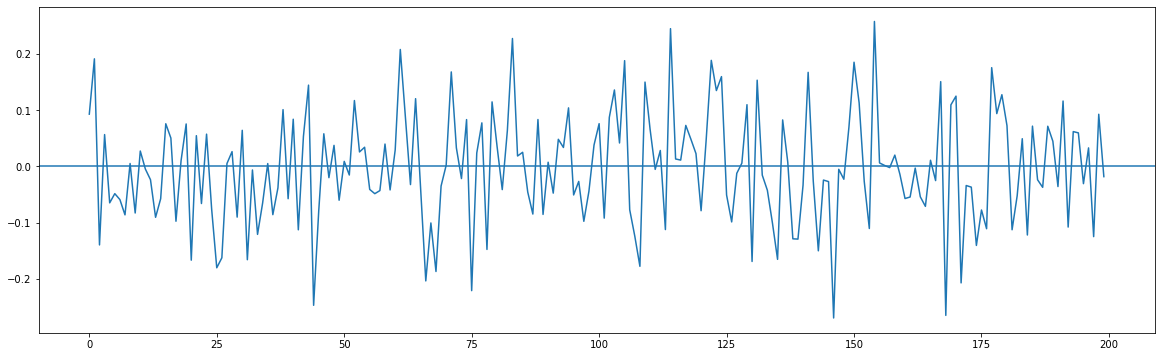

In [33]:
# Plotting the random noise
plt.figure(figsize=(20,6))
plt.axhline(y=0)
plt.plot(x_axis, noise)
plt.show()

* Compute and plot your combined signal. The resulting graph should look (approximately) like the following.
<img src="images/final_timeseries.png" alt="drawing" width="600px"/>



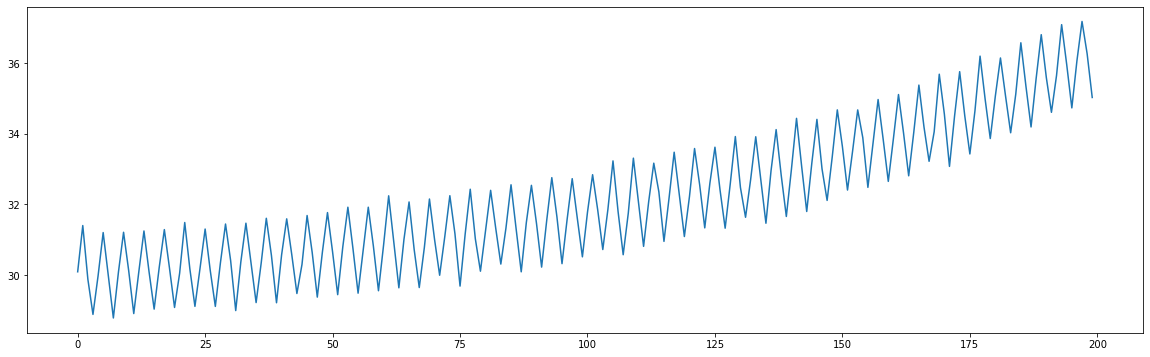

In [32]:
plt.figure(figsize=(20,6))
plt.plot(x_axis, exp + seasonality + noise)
plt.show()


4. Compute the autocorrelation for the 20 first lags and observe that lags  4, 8, 12, 15 represent the 1st, 2nd, 3rd, and 4th highest lags, respectively. 
Your graph should be similar to the graph below.

<img src="images/acf_simulated.png" alt="drawing" style="width:500px;"/>

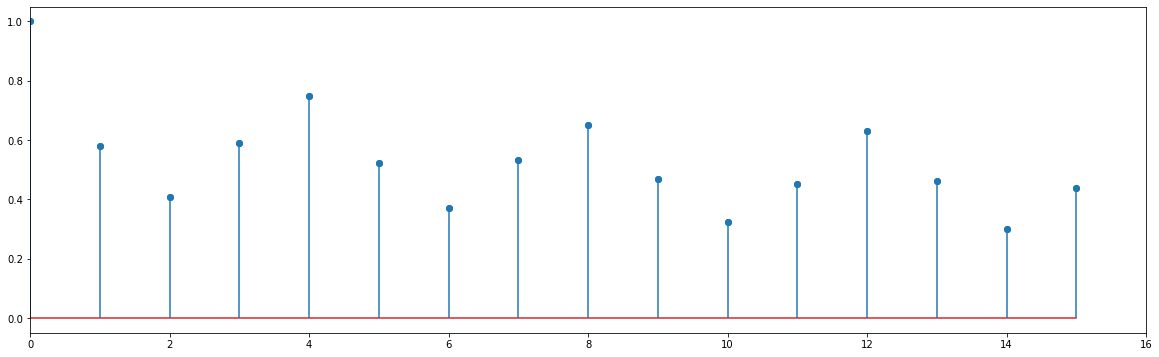

In [107]:
from statsmodels.tsa.stattools import acf

# Reference: https://www.statology.org/autocorrelation-python/
autocorrelation_val = noise+exp+seasonality
autocorrelation_plot_values = acf(autocorrelation_val,  nlags=15, fft = False)
# Plot the figure
plt.figure(figsize=(20,6))
plt.xlim([0, 16])
plt.stem(np.arange(len(autocorrelation_plot_values)), autocorrelation_plot_values)
plt.scatter(np.arange(len(autocorrelation_plot_values)), autocorrelation_plot_values)



What does the graph above tell you about the trend in the data?  How would you explain it to a colleague who is not familiar with the ACF plots nor how they can be used to assess whether there is a trend in the data?

Answer:
Based on the autocorrelation for the first 20 lages, the similarity between the highest and lowest show that every 4 months, there is a strong correlation between the data that shows a trend and seasonality that repeat over the period of the 20 lags.


* While the example above focused on a single sine wave with an amplitude of  1.2 and a frequency of 4 months. Real-time series often have other embedded signals. for instance, in addition to a quarterly seasonality, the data may contain a less robust monthly sign 


* A weaker monthly signal means that:
    1. The signal has a weaker (smaller amplitude). Let's assume the amplitude here is 0.3
    2. The signal's frequency is one month

* Plot the second harmonic based on the information above. Include the first harmonic signal as a reference. Your plot should look like the following.

<img src="images/harmonic_example.png" alt="drawing" style="width:800px;"/>

* Do not forget to label the lines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


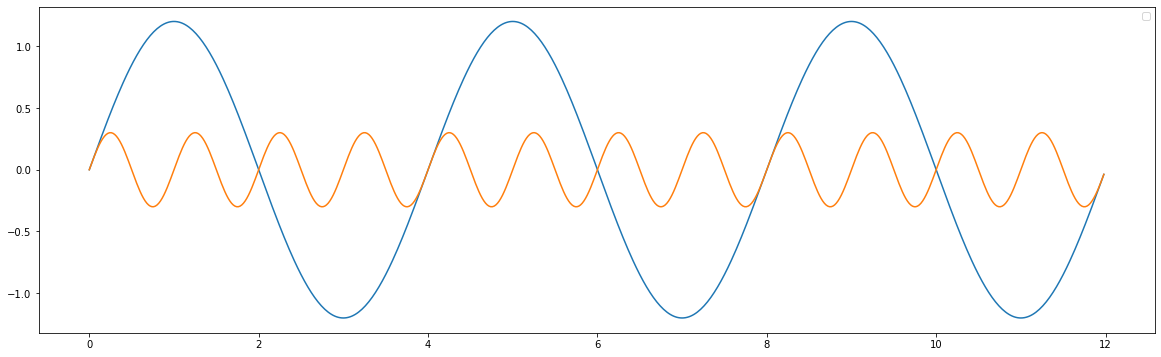

In [65]:
# Determine the range of the sin amplitude
sin_range = np.arange(0, 12, 0.02)
# Calculate the origin sin value
seasonality_values = 1.2 * np.sin(2 * np.pi * sin_range / 4)
# Calculate the seasonality month based on the 0.3 amplitude
seasonality_month = 0.3 * np.sin(2 * np.pi * sin_range)
# Plot the figure
plt.figure(figsize=(20,6))
# Show the legend
plt.legend()
# Plot the Quarterly Values
plt.plot(sin_range, seasonality_values, label='Quarterly')
# Plot the Monthly Values
plt.plot(sin_range, seasonality_month, label='Montly')
# Show the plot
plt.show()



Plot the full seasonality, which includes the first and the second harmonics. Your plot should look like the following.

<img src="images/combined_sines.png" alt="drawing" style="width:900px;"/>

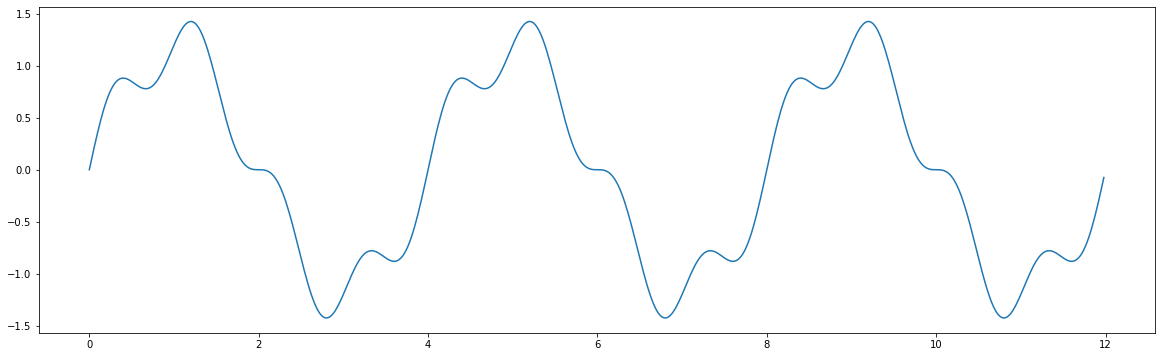

In [66]:
# Plot the figure
plt.figure(figsize=(20,6))
# Determine the harmonics by plotting the trend and each of the corresponding months
plt.plot(sin_range, seasonality_values + seasonality_month)

2. Generate the new time series, which includes the trend, both signal, and the stochastic noise. Your final results should look like the following

<img src="images/signal_with_monthly.png" alt="drawing" style="width:800px;"/>




In [71]:
x_axis = np.arange(0,200)
trend = 29 + 1.01**x_axis
seasonality_values = 1.2 * np.sin(2 * np.pi * x_axis / 4)
seasonality_month = 0.3 * np.sin(2 * np.pi * x_axis)
noise = np.zeros(len(x_axis))
for i,_ in enumerate(x_axis):
    noise[i] = np.random.normal(0,1)

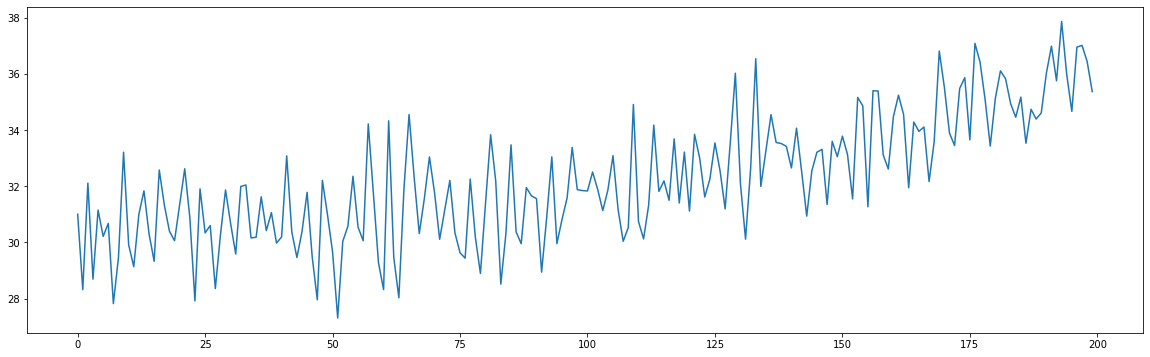

In [73]:
plt.figure(figsize=(20,6))
plt.plot(x_axis, trend + seasonality_values+seasonality_month+noise)
plt.show()

### Question 2: time Series Modeling of Passenger Count for Internationals Departing from LAX

Initially, the approach used here will be very similar to that used above. We will show that not all that looks seasonal can be easily fitted using a line but can be forecasted using triple exponential smoothing instead. 


We will be using a dataset reporting the Los Angeles International Airport Passenger Traffic By Terminal. The data is in the file `data/LAX_final.csv`  and is formatted as a CSV (comma-separated values). The dataset contains multiple fields, but we are only interested in modeling the international departures for LAX between 2009 and 2017. 

Load the data as a pandas DataFrame and used `head()` to make sure the data was read correctly. 

Name you `DataFrame`  as `lax`


In [76]:
# Read in the data as a CSV
lax = pd.read_csv('data/LAX_final.csv')
# Print the data to determine if it was read in correctly
lax.head()

,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,01/01/2006 12:00:00 AM,Imperial Terminal,Arrival,Domestic,490
1,01/01/2006 12:00:00 AM,Imperial Terminal,Departure,Domestic,498
2,01/01/2006 12:00:00 AM,Misc. Terminal,Arrival,Domestic,753
3,01/01/2006 12:00:00 AM,Misc. Terminal,Departure,Domestic,688
4,01/01/2006 12:00:00 AM,Terminal 1,Arrival,Domestic,401535


We are only interested in values associated with international departures. Write an expression to retain only lines where "Arrival_Departure" is equal to "Departure" and "Domestic_International" is equivalent to "International."
 
We are also only interested in the columns `ReportPeriod` (i.e., the period covered) and the `Passenger_Count`, the number of passengers reported during that period. 
Create a new  `DataFrame`  (`Lax_int_dep`) which contains only these two columns and only international departures. 






In [77]:
# Retain only the line where 'Arrival_Departure' = 'Departure'
x = lax.loc[lax['Arrival_Departure']=='Departure']
# Retain only the line where 'Domestic_International' = 'International'
x_1 = x.loc[x['Domestic_International']=='International']
# Create a new DataFrame which contains only two columns and international Departure
Lax_int_dep = x_1[['ReportPeriod', 'Passenger_Count']]

In [78]:
# Print the dataframe
Lax_int_dep

,ReportPeriod,Passenger_Count
6,01/01/2006 12:00:00 AM,561
10,01/01/2006 12:00:00 AM,156751
14,01/01/2006 12:00:00 AM,60948
18,01/01/2006 12:00:00 AM,42256
22,01/01/2006 12:00:00 AM,25531
...,...,...
5776,01/01/2019 12:00:00 AM,449
5780,01/01/2019 12:00:00 AM,93808
5784,01/01/2019 12:00:00 AM,38852
5788,01/01/2019 12:00:00 AM,3054


Compute the total number of passengers (`Passenger_Count`) per month. 
Call your new DataFrame `lax_totals`. Use the shape attribute to make sure that your resulting DataFrame matches the expected results --  recall that the data have reported values for January 2006 through January 2019.


In [79]:
# Get the Report Period from the DataFrame
Lax_int_dep['ReportPeriod'] = pd.to_datetime(Lax_int_dep['ReportPeriod'])
# Get the Index of the Report Period
Lax_int_dep = Lax_int_dep.set_index('ReportPeriod')
# Create the DataFrame for lax_totals with a frequency of observations to a Month Start
lax_totals = Lax_int_dep.resample('MS').sum()

/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Recall that changing the index of the time series dataset simplifies the analysis.  Change the type of your index DataTime Index. Set the frequency of your observations to month start (`MS`).

In [80]:
'''
The value for `lax_totals` was already set to the frequency of Month Start. 
Print the values of the head determined. 
'''
lax_totals.head()

,Passenger_Count
ReportPeriod,
2006-01-01,695800
2006-02-01,600008
2006-03-01,680319
2006-04-01,672268
2006-05-01,723954


The reporting reported includes the financial crisis of 2007-2009 https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008. 

According to news reports, travel in 2009 was ["ravaged"](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/)

Plot the data and see for yourself that the number right before 2009 are significantly lower than during the 2006-2008 period. Your plot should look like the following.


<img src="images/lax_complete.png" alt="drawing" style="width:800px;"/>


Hint: If your data does not look like the following, then check that your DataFrame `index`  **makes sense**


In [81]:
# Checking to determine whether the DataFrame index makes sense
lax_totals.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='ReportPeriod', length=157, freq='MS')

In [82]:
# Deterine the shape of the data to get the range
lax_totals.shape

(157, 1)

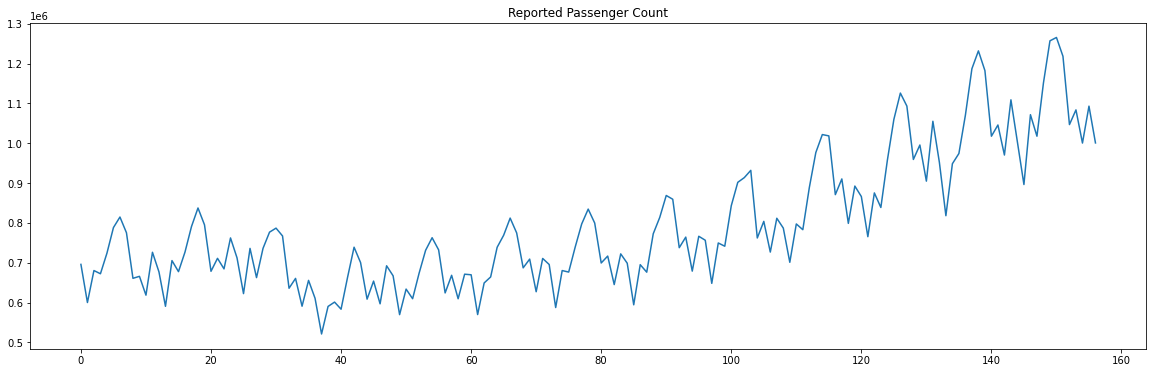

In [83]:
# Determine the range based on the shape of the data
val_range = np.arange(0,157)
# Plotting the figure to determine whether the number before 2009 is lower than the 2006-2008 period
plt.figure(figsize=(20,6))
plt.title('Reported Passenger Count')
plt.plot(val_range, lax_totals.Passenger_Count)
plt.show()


It would be reasonable to remove data before the 2009 financial crisis so that the model is not affected by this `rare` anomaly. Build a new `DataFrame` and call it `lax_totals_post_08`. Use `shape` to make sure the data contains the expected number of entries. It should contain 12 entries for each of the years 2009 through 2018. Plus January 2019.

In [90]:
# Reset the index to the dataframe object to the default (0 -> rows - 1)
lax = lax_totals.reset_index()
# Delete the data based on the key index boolean
lax_totals_post_08 = lax[~(lax['ReportPeriod'] <= '2008-12-01')]
lax_totals_post_08.head()

,ReportPeriod,Passenger_Count
36,2009-01-01,610614
37,2009-02-01,521019
38,2009-03-01,590179
39,2009-04-01,601080
40,2009-05-01,583246


In [91]:
# Check the value of the shape to generate the range
lax_totals_post_08.shape

(121, 2)

Plot the data to make sure the data does not contain the dip associated with 2008.

Your graph should look like the following:


<img src="images/lax_totals_post_08.png" alt="drawing" style="width:800px;"/>


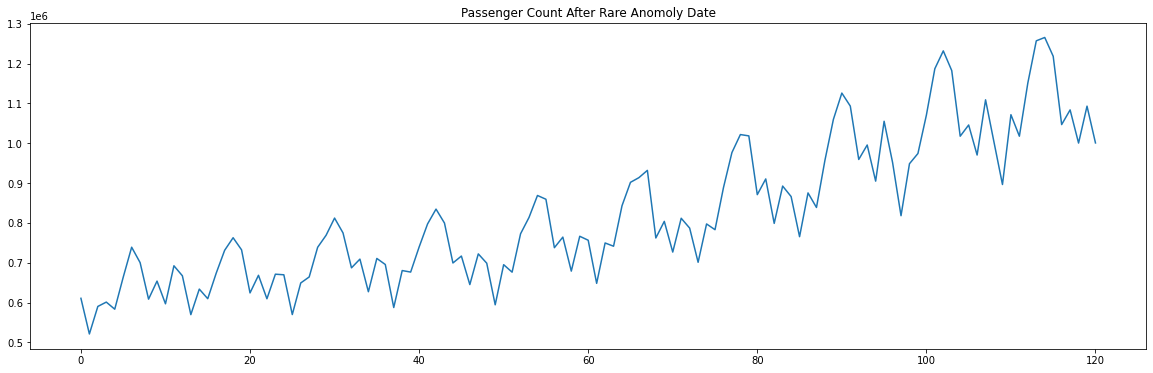

In [93]:
# The range is generated by the shape of the dataframe
val_range = np.arange(0,121)
# Generate the figure
plt.figure(figsize=(20,6))
# Plot the values
plt.plot(val_range, lax_totals_post_08.Passenger_Count)
# Title of the plot
plt.title('Passenger Count After Rare Anomoly Date')
# Show the plot
plt.show()




* The dataset exhibits clear trends and seasonality. We will tackle the modeling of the trend prior to "attempting" to model the seasonality.

* Find the best fitting trend line and use it to detrend the data. You can achieve this by using the same strategy as that covered in class. Specifically,  you need to approximate the data using a power function $y = a x^b$, where are $a$ and $b$ are the constants you need to find.
  * use the `curve_fit` from the scipy.optimize module  to find the curve that best matches `lax_totals_post_08`
  

* Plot your best fitting trend as well as your data. Your graph should look like the following.


<img src="images/trend.png" alt="drawing" style="width:900px;"/>


In [96]:
from scipy.optimize import curve_fit

# Reset the index of the dataframe
lax_totals_post_08 = lax_totals_post_08.reset_index()

# Defining a function power law, where a and b are the constants needed to find
def func_powerlaw(a,x,b):
    # Calculate the power function y = ax^b
    y = a*x**b
    # Return the power function value
    return y

# Generate the range based on the original shape of the data
range = np.arange(0,121,1)

# Use the curve+fit from scipy.optimize to find the curve that best matches the data
popt, pcov = curve_fit(func_powerlaw, range, lax_totals_post_08.Passenger_Count)

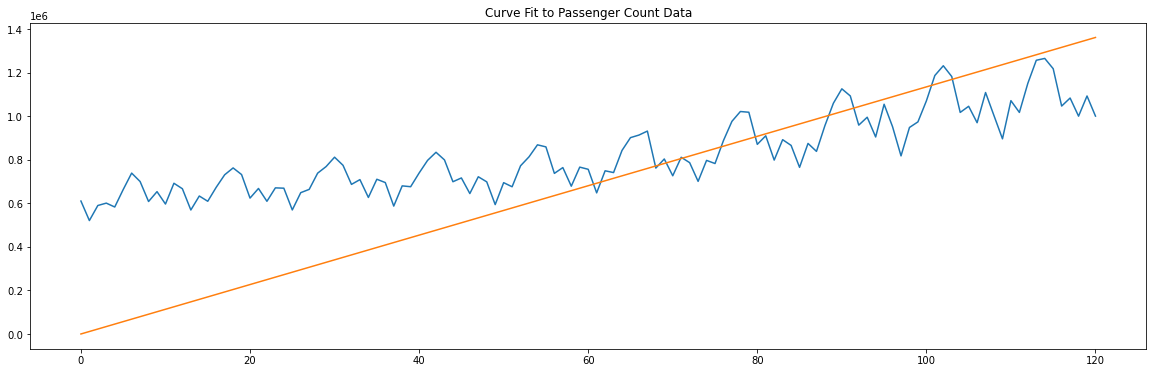

In [97]:
# Generate the figure
plt.figure(figsize=(20,6))
# Title of the figure
plt.title('Curve Fit to Passenger Count Data')
# Plot the values for the data
plt.plot(range, lax_totals_post_08.Passenger_Count)
# From time_series_regression_based.ipynb
plt.plot(range, func_powerlaw(range, *popt))


* In what follows we are going to "try" to identify the seasonality in the data. The approach we will use is similar to that followed in class and above.

* Detrend your data; i.e., Remove the trend so that seasonality is easier to observe. call the detrended data lax_totals_post_08_detrd

* Plot your data to make sure the data is detrended. Your graph should look like the following
  * Plot a horizontal line at y=0 to highlight the seasonality
    
    
<img src="images/detrended.png" alt="drawing" style="width:800px;"/>



In [108]:
# Remove the trend so that the data is easier to observe
# Reminder: See the 'Subtracting the Trend' from tiem_series_based.ipynb
lax_totals_post_08_detrd = lax.Passenger_Count - func_powerlaw(range, popt[0], popt[1])

# Generate the plot
plt.figure(figsize=(20,6))
plt.plot(range, lax_totals_post_08_detrd)
plt.axhline(y=0)
plt.show()



ValueError: operands could not be broadcast together with shapes (157,) (121,) 

* Use the ACF plot to find the highest correation non-zero lag

In [72]:
# Write you code here



* Rather manually and iteratively finding all the harmonics in the signal, we will use the code below, which fits a signal using a user defined `n_harm` number of harmonincs. For instance, the fitted signal using 1, 3, 5, 10 harmonics is giving below.

<img src="images/harmonics.png" alt="drawing" style="width:1000px;"/>

* I computed the graph above using code I obtained from the following gist:
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [73]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict=0, n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

While using a large number of harmonics improves the fits but leads to a very poor forecasting power -- this is referred to as overfitting. We will cover overfitting in more detail in future sessions. 

We suspect that perhaps the data is not stationary. To quickly test this, we can compute the mean and variance of the data for the first half and the second half of the data. 


In [668]:
print(lax_totals_post_08_orig_detrd[0:62].mean())
print(lax_totals_post_08_orig_detrd[62:].mean())

8101.632541181698 4506742754.326138
12299.3283645753 9713869995.095861


The means are largely different across the first half and the second half. This means that the variability across both subsets don't have the same parameters, indicating that the data is non-stationary, i.e. not exhibiting the same behavior all over. Recall that we said that non-stationary data is difficult to model and forecast using line-fitting. Modeling this date will require fitting two models that cover the different behaviors observed. This makes sense since one model can accommodate the different distributions contained across different time subsets.

Instead of modeling the data using a line, you could use triple exponential smoothing (.i.e., exponential smoothing with trend and seasonality added). This method, which was originally part of this assignment was removed and will be covered in class instead.

